In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the data

In [ ]:
from sklearn.datasets import load_boston
bost = load_boston()
type(bost) # sklearn.utils.Bunch
bost.keys() # Output dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
print(bost.data) # To see the data in the dataset
print(bost.target) # to see the dependent feature ie) pricing
print(bost.feature_names) # Column heading

# Converting inot dataframe

In [ ]:
df = pd.DataFrame(bost.data,columns=bost.feature_names)
df['PRICE'] = bost.target
df.head()
df.info()
df.describe() # Statistics of the data
df.isnull().sum() # Checking is there any null values

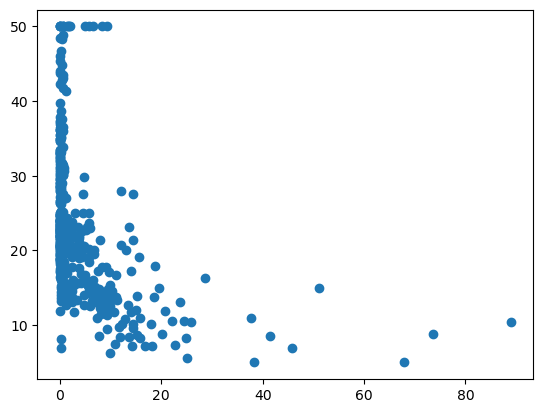

In [69]:
# Correlation -- It is important in any regression problem because we really need to find out how the independent features
# are correlated with the dependent feature
# If they are highly positively correlated or highly negatively correlated theen we can assume that our model performance
# will definitly be high
# if there are high correlation between independent features then we can drop one feature 
# this is known as multicollinearity
df.corr() 
plt.scatter(df['CRIM'],df['PRICE']) # Plot between crime and price from this plot we can come to a conclusion that 
# if the crime increases the price decreases

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

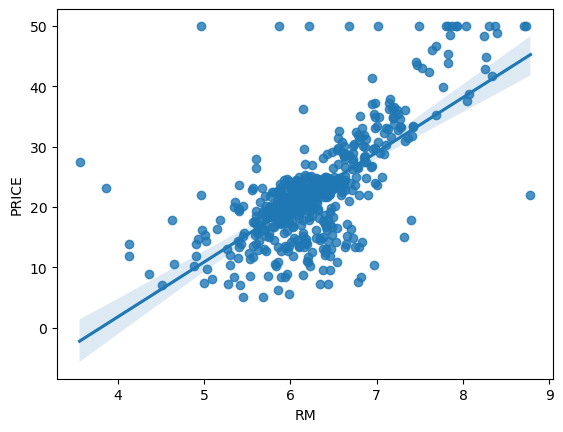

In [70]:
sns.regplot(x='RM',y='PRICE',data=df) # this is positively correleated # Similarly we can take any other feature

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

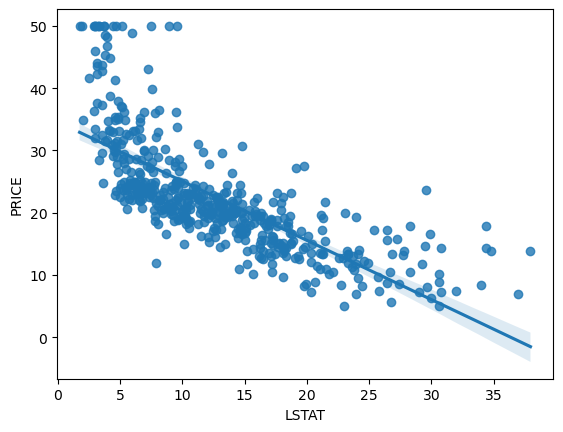

In [71]:
sns.regplot(x='LSTAT',y='PRICE',data=df) # This is negatively correlated

<AxesSubplot:xlabel='CHAS', ylabel='PRICE'>

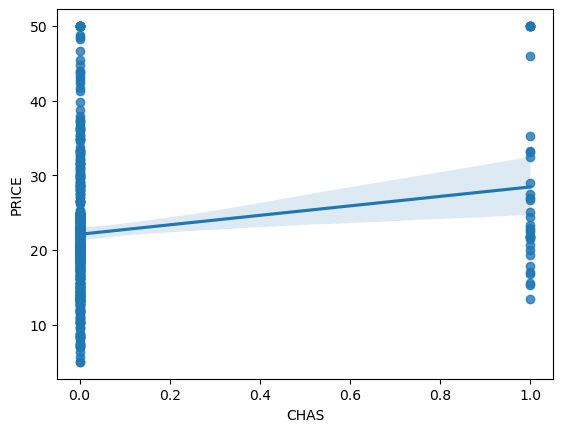

In [72]:
sns.regplot(x='CHAS',y='PRICE',data=df) # This is notatall correlated 
# it is important that linearity should definitly present in our dataset linearity basically means if x is 
# increasing y is increasing (or) if x is decreasing y is increasing to create a better regression model

In [73]:
# splitting the data into dependent and independent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [74]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [75]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # for the test data we just need to transform

In [76]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train) # in order to train our model
# once we do fit on that dataset we create a hyperplane

LinearRegression()

In [77]:
# whenever we solve a regression problem the two important things are coefficients and intercept
print(regression.coef_) # the number of coefficients will always be equall to the number of independent features because 
# for every independent we will have the coefficient
print(regression.intercept_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
23.01581920903956


In [78]:
# To find on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

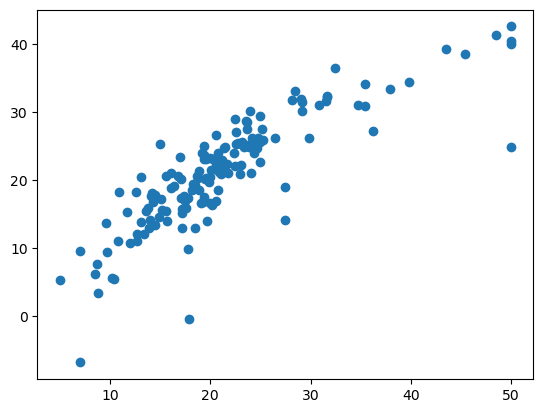

In [79]:
# Predection using test data
reg_pred = regression.predict(X_test) 
reg_pred # prediction we got from our model
plt.scatter(y_test,reg_pred) # plotting original values and the predected values if the graph is linear then model is good

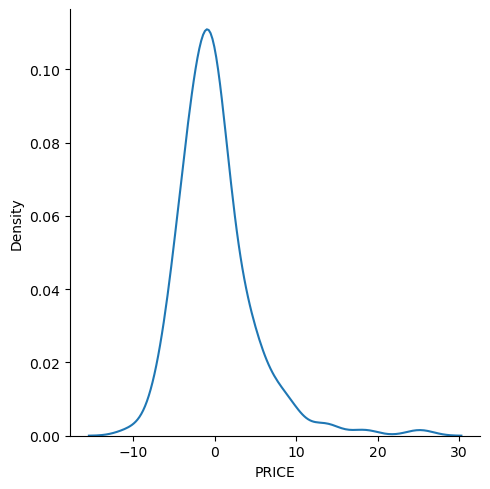

In [80]:
# calculating residuals 
# here residuals is errors with respect to y_test and reg_pred 
residuals = y_test-reg_pred
residuals
# plotting the residuals
sns.displot(residuals,kind="kde") # whenever we do this kind of plot with residuals we should get normal distribution

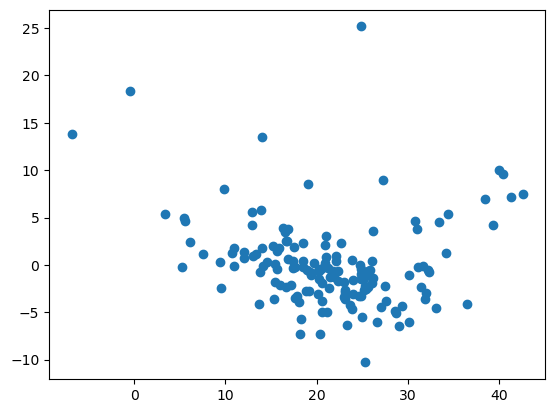

In [81]:
# Scatter plot with respect to prediction and residuals
plt.scatter(reg_pred,residuals) # uniform distribution

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
# Mean Squared Error (MSE) is a commonly used metric to evaluate the performance of a regression model. 
# It measures the average squared difference between the predicted values and the actual values of the target variable.
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
# To find the root mean squared error
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

# calculating R^2 error
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score*100)
# calculating adjusted r^2 there is no library for calculating adjusted r^2
adj_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1) # Formula
print(adj_r2*100)

21.517444231177194
3.162709871457404
4.638689926172819
71.12260057484934
68.40226584639312


In [83]:
# Prediction for new data
bost.data[0].reshape(1,-1)
# we are doing this because before we the data in a 2D but here the data is in 1d so we are
# reshaping the data into 2D

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [84]:
# Transforming the data
scaler.transform(bost.data[0].reshape(1,-1))

C:\Users\girid\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [85]:
# Predicting
regression.predict(scaler.transform(bost.data[0].reshape(1,-1)))

C:\Users\girid\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

# Pickling the model file for deployment

In [86]:
# Pickle is a serialized format file so that it can be deployed in any server  

import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))   # inorder to convert this file into a pickle file wb - write binary
# 1. first parameter is the object
# 2. file Second comma represents on which file i am going to put(or) pickle this entire object
# 3. Indicates that this should be opened in the write byte mode it says that if the file does not exists in the local folder 
# in which folder the file is running in the same folder it will create a pickle file

In [87]:
pickled_model = pickle.load(open('regmodel.pkl','rb')) # rb means read byte mode
pickled_model.predict(scaler.transform(bost.data[0].reshape(1,-1)))

C:\Users\girid\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])